# Proof of concept for our CNN

This doc is a proof that I can use a Convolutional neural network to train a model to rate images

### First we set up our environment:

In [9]:
import pickle
import numpy as np
import csv
import os
from tensorflow.keras import datasets, models, layers
import tensorflow as tf


In [10]:

# import CIFAR-10 images (as before)
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        images = batch['data']
        labels = batch['labels']
    return images, labels

def reshape_images(images):
    images = images.reshape(-1, 3, 32, 32)
    images = np.transpose(images, (0, 2, 3, 1))  # order on batch_size, height, width, channels
    return images

images, labels = load_cifar_batch('C:/Users/samia/OneDrive/Desktop/cosc 499/capstone-project-team-9-Order-Of-Aesthetics/data/cifar-10-batches-py/data_batch_1')
images = reshape_images(images) / 255.0  # normalize


In [11]:

# read from CSV
csv_file = 'C:/Users/samia/OneDrive/Desktop/cosc 499/capstone-project-team-9-Order-Of-Aesthetics/data/prototype_image_ratings.csv'
image_ratings = {}

with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip 1st line
    for row in reader:
        image_id, rating = int(row[0]), int(row[1])
        image_ratings[image_id] = rating


In [12]:

# filter images based on available ratings
rated_images = []
rated_labels = []
for img_id, rating in image_ratings.items():
    rated_images.append(images[img_id])
    rated_labels.append(rating)

rated_images = np.array(rated_images)
rated_labels = np.array(rated_labels)

### Now lets define the model:

In [17]:


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # our output is a param of 1 int

# compile time
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])  # avg abs error


C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training time:

In [18]:
# training line
history = model.fit(rated_images, rated_labels, epochs=10, validation_split=0.2)

# evaluate
test_loss, test_mae = model.evaluate(rated_images, rated_labels, verbose=2)
print(f'Test MAE: {test_mae}')


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 32.5718 - mae: 5.2998 - val_loss: 3.3683 - val_mae: 1.5820
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 29.2041 - mae: 4.9867 - val_loss: 2.0988 - val_mae: 1.1697
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 24.7938 - mae: 4.5411 - val_loss: 0.8342 - val_mae: 0.6189
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.5598 - mae: 3.8275 - val_loss: 0.7164 - val_mae: 0.8123
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.6770 - mae: 2.7606 - val_loss: 5.3551 - val_mae: 2.2189
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.9012 - mae: 1.6494 - val_loss: 22.4165 - val_mae: 4.6186
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.1017 - mae: 2.0231 - val_loss: 31.1512 - val_mae: 5.4466
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.1476 - mae: 2.7382 - val_loss: 24.0565 - val_mae: 4.7850
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.7720 - mae: 2.

//error of 1.8465993404388428 for n=4

//error of 1.7623370885849 for n=30

### Now lets do some predicting to test our neural net:

In [26]:
# predict time
predicted_rating = model.predict(np.expand_dims(rated_images[0], axis=0))
print(f"Predicted rating for the image: {predicted_rating[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted rating for the image: 5.1918864250183105


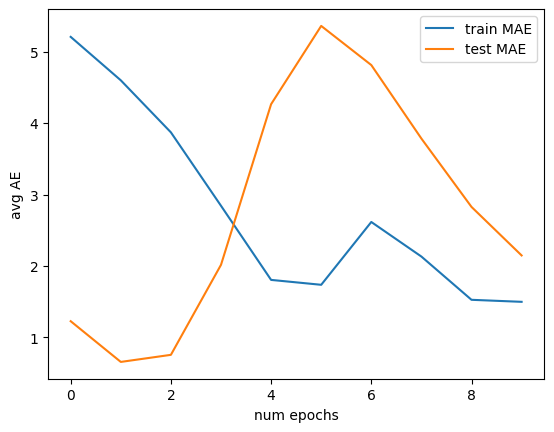

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='train MAE'); plt.plot(history.history['val_mae'], label='test MAE')
plt.xlabel('num epochs'); plt.ylabel('avg AE'); plt.legend(); plt.show()